# **Research Question:** *Are disability claims related to a state's obesity rate? If so, can attempting to reduce a state's disability benefit rate lower the obese population?*
*By: Ryker Radley, Bryce Ulloa, and Annalee MacArthur*

##**Introduction and Explanation of the research question**
Obesity has been an issue plaguing the United States of America for years now. Obesity impacts many individuals lives. Obesity impacts our healthcare systems and government programs. Obesity impacts America. This is why there are many efforts to slow and reduce the obesity rate. In our research, our hypothesis is that there are correlation between obesity and disability claims. If this turns out to be true, we may be able to look at characteristics of individuals who claim disability to target and lower obesity.

Sources:
> https://www.ssa.gov/disability/data/ssa-sa-fywl.htm#FieldH \\
> https://www.cdc.gov/brfss/brfssprevalence/index.html






In [ ]:
#import all needed libraries and mount drive
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
import plotly, plotly.express as px
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive', force_remount=True)
fpath = 'drive/MyDrive/Data Analytics/Final Project/' # change the path here
os.listdir(fpath)

Mounted at drive


['Obesity.xlsx', 'SSA_Data.xlsx', 'Final Project']

In [ ]:
#putting our data into data frames
obesity = pd.read_excel(fpath + 'Obesity.xlsx', index_col = 0).reset_index()
ssa = pd.read_excel(fpath + 'SSA_Data.xlsx', index_col = 0).reset_index()

In [ ]:
#transforming data to merge easier
obesity.columns = ['Year','State Code','LocationDesc','Obese %','Sample_Size']
data = obesity[['Year','State Code','Obese %']]
ssa['State Code'] = ssa['State Code'].str.strip()
obesity.head()

,Year,State Code,LocationDesc,Obese %,Sample_Size
0,2011,AL,Alabama,32.0,7304
1,2011,MD,Maryland,28.3,9450
2,2011,TN,Tennessee,29.2,5575
3,2011,MI,Michigan,31.3,10579
4,2011,RI,Rhode Island,25.4,6182


In [ ]:
ssa.head()

,Region Code,State Code,Year,Population age 18-64*,SSA Disability Beneficiaries age 18-64*,Percent of Adult Population Receiving SSA Adult Disability Benefits,Eligible Adult Population*,Adult Favorable Determination Rate,All Favorable Determinations,Favorable Determination Rate
0,SEA,AK,2011,476064,19656,4.13,456408,44.94,2502,47.23
1,ATL,AL,2011,3003011,314263,10.46,2688748,29.63,23431,29.66
2,DAL,AR,2011,1798406,185925,10.34,1612481,31.26,16213,33.46
3,SFO,AZ,2011,3935556,202236,5.14,3733320,26.96,13136,30.02
4,SFO,CA,2011,24021369,1156894,4.82,22864475,32.76,86978,34.95


In [ ]:
#new data set
df_ssa = pd.merge(ssa,data,how='left',on=['Year','State Code'])
df_ssa.columns = ['Region','State','Year','Population','ssa_beneficiaries','receiving_benefits','eligible_pop','Adult_rate','Fav_Determ','Fav_rate','Obese']

df_ssa.head()

,Region,State,Year,Population,ssa_beneficiaries,receiving_benefits,eligible_pop,Adult_rate,Fav_Determ,Fav_rate,Obese
0,SEA,AK,2011,476064,19656,4.13,456408,44.94,2502,47.23,27.4
1,ATL,AL,2011,3003011,314263,10.46,2688748,29.63,23431,29.66,32.0
2,DAL,AR,2011,1798406,185925,10.34,1612481,31.26,16213,33.46,30.9
3,SFO,AZ,2011,3935556,202236,5.14,3733320,26.96,13136,30.02,25.1
4,SFO,CA,2011,24021369,1156894,4.82,22864475,32.76,86978,34.95,23.8


## Explanation of the columns



---


**Region:** All states were divided into regions. The three letters is a code to what region the state was assigned. \\
**State:** The state for which the data represents. \\
**Year:** The year the data was collected. \\
**Population:** Population of the region the data was collected. \\
**ssa_beneficiaries:** Number of individuals who collect SSA benefits in the region. \\
**receiving_benefits:** The percentage of individuals receiving SSA benefits divided by population of the region. \\
**eligible_pop:** This column represents the adult population who could receive benefits, but aren't. (Population - ssa_beneficiaries) \\
**Adult_rate:** Percentage of adults who received a favorable determination for their claim. \\
**Fav_Determ:** Number of favorable determinations.  \\
**Fav_rate:** Percentage of favorable determinations from a state agency over total determinations. \\
**Obese:** Percentage of Obese Adults. \\


---



##Basic Statistics

In [ ]:
df_ssa.describe()

,Year,Population,ssa_beneficiaries,receiving_benefits,eligible_pop,Adult_rate,Fav_Determ,Fav_rate,Obese
count,572.000000,5.720000e+02,5.720000e+02,572.000000,5.720000e+02,572.000000,572.000000,572.000000,559.000000
mean,2016.000000,3.915878e+06,2.405175e+05,6.513462,3.659198e+06,35.020210,16264.379371,36.856189,30.166190
std,3.165046,4.452309e+06,2.335138e+05,1.981239,4.240021e+06,6.555877,17177.367972,6.588285,4.098013
min,2011.000000,3.427520e+05,1.588600e+04,2.730000,1.063370e+05,23.760000,874.000000,24.570000,20.200000
25%,2013.000000,1.096091e+06,6.137175e+04,5.050000,9.759302e+05,30.702500,4338.250000,32.627500,27.150000
50%,2016.000000,2.727442e+06,1.818505e+05,6.120000,2.434976e+06,34.135000,11484.500000,36.260000,30.100000
75%,2019.000000,4.469162e+06,2.990752e+05,7.610000,4.192477e+06,38.382500,20462.500000,40.385000,33.000000
max,2021.000000,2.555278e+07,1.191554e+06,12.570000,2.453502e+07,66.070000,94607.000000,66.070000,40.800000


##Visualizations of the data

###Line Plots

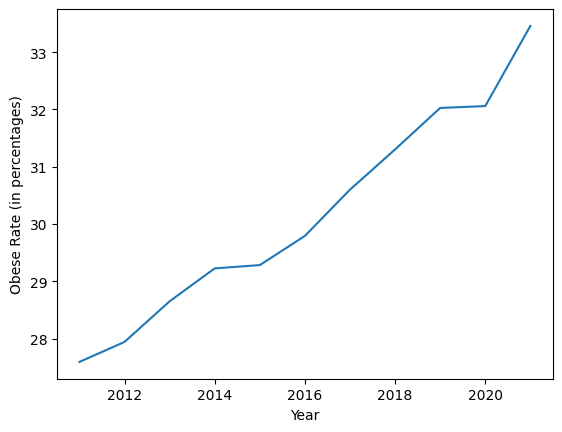

In [ ]:
#This shows the trend of Obesity and the Year
df_ssa.groupby('Year')['Obese'].mean().plot(kind = 'line')
plt.ylabel('Obese Rate (in percentages)')
plt.show()

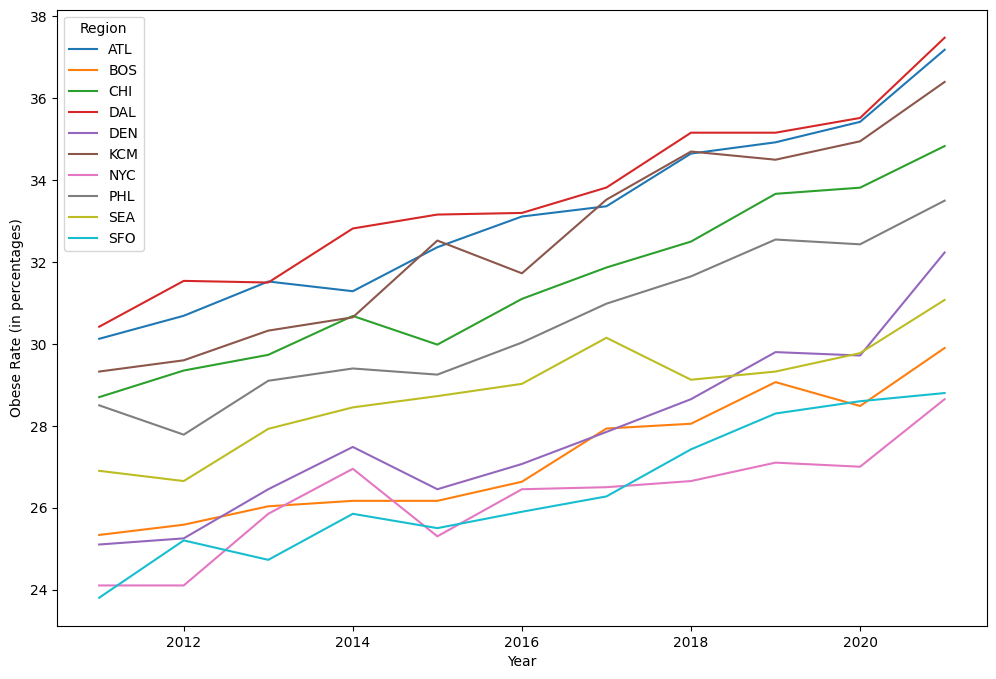

In [ ]:
#This shows the trend of Obesity by Region and the Year
df_ssa.groupby(['Year','Region'])['Obese'].mean().unstack('Region').plot(kind = 'line',figsize = (12,8))
plt.ylabel('Obese Rate (in percentages)')
plt.show()

ATL:  Atlanta Region (SSA Region 4), includes AL, FL, GA, KY, MS, NC, SC, TN. \\
BOS:  Boston Region (SSA Region 1), includes CT, MA ME, NH, RI, VT. \\
CHI: Chicago Region (SSA Region 5), includes IL, IN, MI, MN, OH, WI. \\
DAL: Dallas Region (SSA Region 6), includes AR, LA, NM, OK, TX. \\
DEN:  Denver Region (SSA Region 8), includes CO. MT, ND, ST, UT, WY. \\
KCM: Kansas City Region (SSA Region 7), includes IA, KS, MO, NE. \\
NYC:  New York Region (SSA Region 2), includes NJ, NY, PR. \\
PHL: Philadelphia Region (SSA Region 3), includes DC, DE, MD, PA, VA, WV. \\
SEA:  Seattle Region (SSA Region 10), includes AK, ID, OR, WA. \\
SFO:  San Francisco Region (SSA Region 9), includes AZ, CA, HI, NV. \\

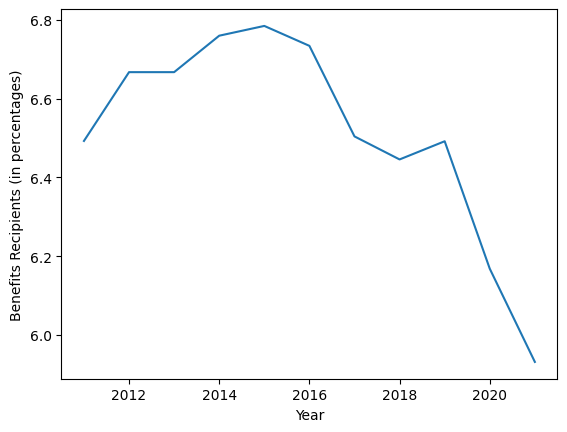

In [ ]:
#This shows the trend of SSI Benefits Recipients and the Year
df_ssa.groupby('Year')['receiving_benefits'].mean().plot(kind = 'line')
plt.ylabel('Benefits Recipients (in percentages)')
plt.show()

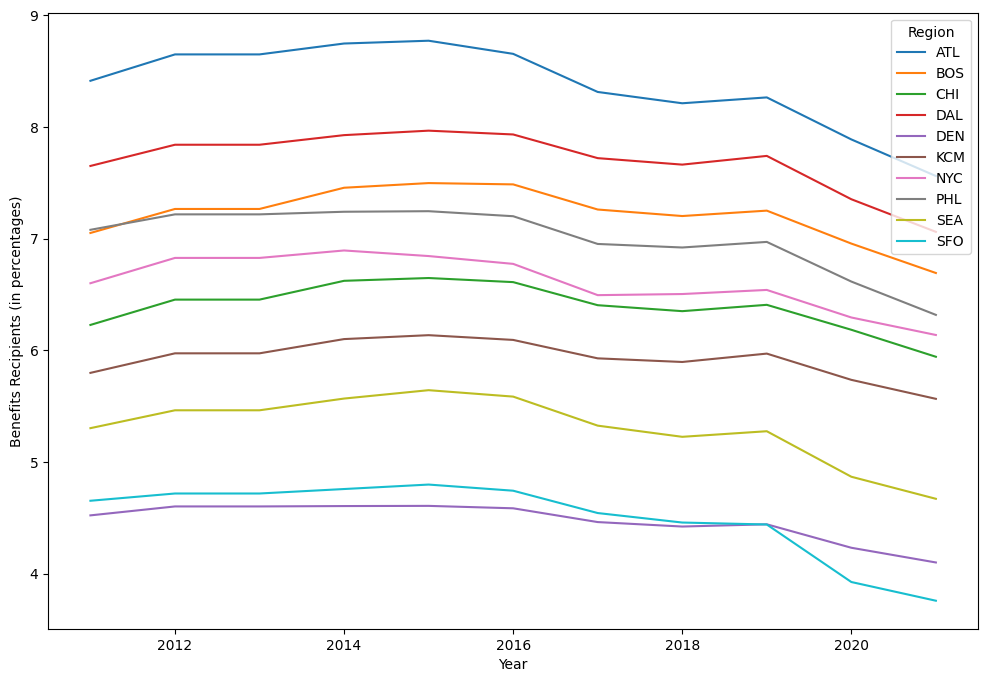

In [ ]:
#This shows the trend of SSI Benefits Recipients by Region and the Year
df_ssa.groupby(['Year','Region'])['receiving_benefits'].mean().unstack('Region').plot(kind = 'line',figsize = (12,8))
plt.ylabel('Benefits Recipients (in percentages)')
plt.show()

####Discussion of the Line Plots



1.   The first two plots show a trend between the year and the average obesity rate. This trend is important because it is one of the **largest trends** in the data set. It was important to split the average obesity rate in the second plot among the regions to show how the trend was not perfectly consistent, but all regions still trended upwards.
2. The next two line plots show the average SSI Beneficiary rate trend over the years. Similarly, the second line plot split the line plot by region which helped show that the SSI Beneficiary rate was far **more dependent on regions** than it was time.



###Scatter Plot

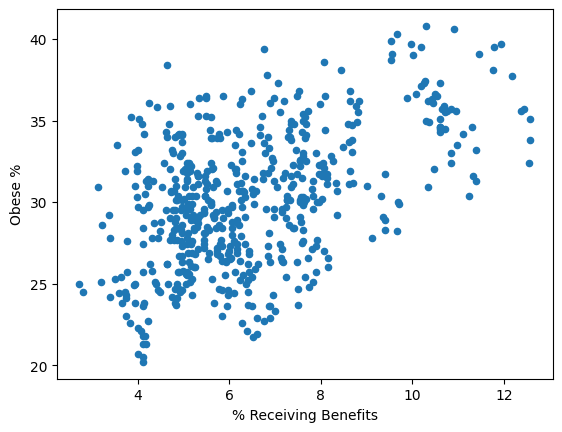

In [ ]:
#Scatter plot of Obesity and % People Receiving Benefits
df_ssa.plot(kind='scatter',x='receiving_benefits',y='Obese')
plt.xlabel('% Receiving Benefits')
plt.ylabel('Obese %')
plt.show()

####Discussion of the Scatter Plot

The scatter plot is between Obesity rate and the rate of individuals receiving benefits. This shows a weak positive correlation between these two variables.

###Maps

In [ ]:
data = df_ssa.groupby('State')['receiving_benefits'].mean().reset_index()
# create figure
fig = px.choropleth(data, locations="State", locationmode="USA-states",
    color="receiving_benefits", scope="usa", color_continuous_scale="matter", title="Receiving Benefits by State")

fig.show()


In [ ]:
data = df_ssa.groupby('State')['Obese'].mean().reset_index()
# create figure
fig = px.choropleth(data, locations="State", locationmode="USA-states", color="Obese",
    scope="usa", color_continuous_scale="matter", title="Obesity by State")

fig.show()

In [ ]:
df_ssa_x = df_ssa
df_ssa_x['Obese_x'] = df_ssa_x.Obese * df_ssa_x.receiving_benefits
data = df_ssa.groupby('State')['Obese_x'].mean().reset_index()
# create figure
fig = px.choropleth(data, locations="State", locationmode="USA-states", color="Obese_x",
    scope="usa", color_continuous_scale="matter", title="Obesity * Rate Receiving Benefits")

fig.show()

####Discussion of the Maps
1.   The first map shows the average percent of individuals receiving benefits by state. This helps give a visual where the higher claims states exist.
2.   The second map shows the average obesity by state. This allows visual comparison between where there are high levels of obesity and individuals receiving SSI benefits.
3.   The third map are the obesity rate and the benefit recipient rate multiplied to attempt to show the regions where these variables are both higher/lower.






#Regressions

In [ ]:
#All numerical variables
res = smf.ols('Obese ~ Year + Population + ssa_beneficiaries + receiving_benefits + eligible_pop + Adult_rate + Fav_Determ + Fav_rate', data = df_ssa).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     68.51
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.19e-77
Time:                        16:13:33   Log-Likelihood:                -1387.9
No. Observations:                 559   AIC:                             2794.
Df Residuals:                     550   BIC:                             2833.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1403.1680     96

In [ ]:
#All numerical variables aside from year
res = smf.ols('Obese ~ Population + ssa_beneficiaries + receiving_benefits + eligible_pop + Adult_rate + Fav_Determ + Fav_rate', data = df_ssa).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     33.98
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           2.25e-39
Time:                        16:13:33   Log-Likelihood:                -1480.8
No. Observations:                 559   AIC:                             2978.
Df Residuals:                     551   BIC:                             3012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.6940      1

In [ ]:
#Using only % data
res = smf.ols('Obese ~ receiving_benefits + Adult_rate + Fav_rate', data = df_ssa).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     67.53
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.10e-37
Time:                        16:13:33   Log-Likelihood:                -1494.2
No. Observations:                 559   AIC:                             2996.
Df Residuals:                     555   BIC:                             3014.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.7647      1

In [ ]:
#Using only % data and year
res = smf.ols('Obese ~ Year + receiving_benefits + Adult_rate + Fav_rate', data = df_ssa).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     133.3
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.02e-79
Time:                        16:13:33   Log-Likelihood:                -1392.7
No. Observations:                 559   AIC:                             2795.
Df Residuals:                     554   BIC:                             2817.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1313.4548     85

In [ ]:
#Year and Beneficiaries
res = smf.ols('Obese ~ Year + Population + ssa_beneficiaries + receiving_benefits', data = df_ssa).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     133.2
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.18e-79
Time:                        16:13:33   Log-Likelihood:                -1392.8
No. Observations:                 559   AIC:                             2796.
Df Residuals:                     554   BIC:                             2817.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1241.5030     79

In [ ]:
#Including Regions in the Regression
res = smf.ols('Obese ~ Year + Population + ssa_beneficiaries + receiving_benefits + C(Region)', data = df_ssa).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     101.6
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          2.89e-136
Time:                        16:13:33   Log-Likelihood:                -1237.1
No. Observations:                 559   AIC:                             2502.
Df Residuals:                     545   BIC:                             2563.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1194.1840     61

In [ ]:
#Including States in the Regression
res = smf.ols('Obese ~ Year + Population + ssa_beneficiaries + receiving_benefits + C(State)', data = df_ssa).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          3.16e-275
Time:                        16:13:33   Log-Likelihood:                -788.86
No. Observations:                 559   AIC:                             1688.
Df Residuals:                     504   BIC:                             1926.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1047.8235     35

**Discussion of the variables among the regressions** \\
Through these regressions, we have attempted multiple variations to see the impact of the different variables when included in the regression. The most consistently significant variables tended to be Year and rate of SSA Disability Beneficiaries (Highest T-Stats). Along with this, the R-Squared increased drastically when we included either the state or region in the regression.

##Final regressions and Conclusion

In [ ]:
#adjusting the years proportionally from 2011 to 0; making 2011 the base year
df_ssa_ye = df_ssa
df_ssa_ye.Year = df_ssa_ye['Year'] - 2011

###First Regression (by Regions)

This is the equation for the first regression.

---



$$
\text{%Obese} = \beta_0 + \beta_1 \text{ Year} + \beta_2 \text{%Receiving Benefits}+ \beta_3 \text{Region}+ e
$$


---



In [ ]:
#Regions Final Regression
res = smf.ols('Obese ~ Year + receiving_benefits + C(Region)', data = df_ssa_ye).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     119.1
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          2.33e-137
Time:                        16:13:33   Log-Likelihood:                -1239.4
No. Observations:                 559   AIC:                             2503.
Df Residuals:                     547   BIC:                             2555.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.8747      0

Equation for Denver Region

---


$$
\text{%Obese} = \text{21.8747} + \text{0.6107 * Year} + \text{0.9766 * %Receiving Benefits} - \text{1.4715}+ e
$$


---



**Discussion on the Regression** \\
The takeaway from this regression is that the nation's increase in obesity year after year tended to have a large impact on the regression. The rate of individuals receiving benefits has a large impact upon the regression as well, but more importantly shows that there is a positive correlation between obesity and SSA benefits. For every 1% increase in SSA Disability benefits rate, there is a 0.9766% increase in the obesity rate. Lastly, it is important to mention that the region has a significant impact on the regression. Knowing this, we could find additional similarities in each region that may have a larger contributing factor towards a state's obesity rate.

###Second Regression (by States)

This is the equation for the second regression.

---


$$
\text{%Obese} = \beta_0 + \beta_1 \text{ Year} + \beta_2 \text{%Receiving Benefits}+ \beta_{3} \text{State}+ e
$$


---



In [ ]:
#Final Regression
res = smf.ols('Obese ~ Year + receiving_benefits  + C(State)', data = df_ssa_ye).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          2.14e-277
Time:                        16:13:34   Log-Likelihood:                -788.92
No. Observations:                 559   AIC:                             1684.
Df Residuals:                     506   BIC:                             1913.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.8070      0

Equation for Utah

---


$$
\text{%Obese} = \text{ 28.8070} + \text{0.5353 * Year} + \text{-0.3212 * %Receiving Benefits} - \text{3.9667}+ e
$$


---



**Discussion on the Regression** \\
This regression had a drastically different result compared to the 'Regions' regression. This regression shows that although year and benefits rate are significant, the obesity rate is likely better explained by the state the data comes from.

#Conclusion

##Issues with the research


---


The largest issue with our data set is the limited number of years/observations for our data (2011 to 2021). Futhermore, we acknowledge the limited number of variables used and limited time for collection/analyzing data. Another issue may be the researchers misunderstanding/misinterpretation of the data. Lastly, we were dependent upon other organizations for the data which limits our knowledge of the true accuracy of the data given.


---



##Conclusion & Recommendation


---



---

In conclusion, the Social Security Disability Benefits has a positive correlation with obesity. However, breaking it down by state better explains the data. This is shown through the higher R-Squared when states are included. This illustrates that there is a trend that the causes of SSA Disability Benefits likely lead to higher obesity, but focusing on obesity issues by a state would likely result in better outcomes. \\
\
Our recommendation is for the United States to contrast the difference in States with higher obesity to states with lower obesity to find meaningful differences that policymakers can address. While doing this, they can start by looking at what issues lead individuals to apply and use SSA programs such as disability. Pinpointing and addressing the issues that put individuals on SSA benefits will likely indirectly address obesity and bring a healthier America.


